# Read and Clean data

In [95]:
import pathlib
import pandas as pd


In [96]:
PROJECT_DIR = pathlib.Path().resolve().parent

DATA_DIR = PROJECT_DIR / "data/data_src"
SRC_DATA = DATA_DIR / "data.csv"


In [97]:
source_data = pd.read_csv(SRC_DATA)

print(source_data.info())
source_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          10000 non-null  int64  
 1   LIMIT_BAL                   10000 non-null  float64
 2   SEX                         10000 non-null  int64  
 3   EDUCATION                   10000 non-null  int64  
 4   MARRIAGE                    10000 non-null  int64  
 5   AGE                         10000 non-null  int64  
 6   PAY_0                       10000 non-null  int64  
 7   PAY_2                       10000 non-null  int64  
 8   PAY_3                       10000 non-null  int64  
 9   PAY_4                       10000 non-null  int64  
 10  PAY_5                       10000 non-null  int64  
 11  PAY_6                       10000 non-null  int64  
 12  BILL_AMT1                   10000 non-null  float64
 13  BILL_AMT2                   1000

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,PAY_1
0,1,50000.0,2,3,2,23,2,0,0,0,...,27828.0,28411.0,2190.0,2027.0,2204.0,996.0,1031.0,1047.0,0,NaN
1,2,10000.0,1,3,2,25,0,0,0,0,...,17890.0,10000.0,1500.0,5000.0,4000.0,2000.0,22400.0,0.0,0,NaN
2,3,150000.0,1,3,1,52,0,0,0,0,...,97589.0,99921.0,2564.0,2616.0,2647.0,4000.0,3158.0,2215.0,1,NaN
3,4,280000.0,2,2,2,26,0,0,0,0,...,29852.0,30717.0,1800.0,1800.0,1800.0,1500.0,1500.0,1500.0,0,NaN
4,5,360000.0,2,1,1,41,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN


# 1.0 Data Monging

In [98]:
# Remove useless columns
# ID is no use, PAY1 is not in data dictionary, 
#cols_to_drop = ['ID', 'PAY_1']
# Remove cols ID and Pay_0 to Pay_7 for now
cols_to_drop = ['PAY_' + str(i) for i in range(7)] + ['ID']
clean_data = source_data.copy().drop(columns=cols_to_drop)
#print(clean_data.isnull().sum())

# Rename labels 
clean_data = clean_data.rename({'default.payment.next.month':'labels'}, axis=1)
print(clean_data.isnull().sum())

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
labels       0
dtype: int64


In [99]:
# Remove na and duplicates
#clean_data = clean_data.dropna()
#clean_data = clean_data.drop_duplicates()

## 1.2 Translate text coding to numbers

In [100]:
for col in ['SEX', 'EDUCATION', 'MARRIAGE']:
    print(clean_data[col].value_counts())

2    6023
1    3977
Name: SEX, dtype: int64
2    4585
1    3514
3    1633
6     124
5      90
4      46
0       8
Name: EDUCATION, dtype: int64
2    5287
1    4476
3     224
0      13
Name: MARRIAGE, dtype: int64


In [101]:
# Use dict to translate
GENDER_dict = {1:'male', 2:'female'}
GENDER_inv = {v:k for k,v in GENDER_dict.items()}
EDUCATION_dict = {0: 'education_other', 1 : 'graduate_school', 2 : 'university', 3: 'high_school'\
                  , 4 : 'education_other', 5 : 'education_other', 6 : 'education_other'}
EDUCATION_inv = {v:k for k,v in EDUCATION_dict.items()}
MARRIAGE_dict = {0:'marriage_other', 1:'married', 2:'single', 3:'marriage_other'}
MARRIAGE_inv = {v:k for k,v in MARRIAGE_dict.items()}
label_dict = {0: 'yes', 1:'no'}
label_inv = {v:k for k,v in label_dict.items()}

In [102]:
clean_data['SEX'] = clean_data['SEX'].replace(GENDER_dict)
clean_data['EDUCATION'] = clean_data['EDUCATION'].replace(EDUCATION_dict)
clean_data['MARRIAGE'] = clean_data['MARRIAGE'].replace(MARRIAGE_dict)
clean_data['labels'] = clean_data['labels'].replace(label_dict)
clean_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,labels
0,50000.0,female,high_school,single,23,50653.0,49348.0,47995.0,40226.0,27828.0,28411.0,2190.0,2027.0,2204.0,996.0,1031.0,1047.0,yes
1,10000.0,male,high_school,single,25,8525.0,5141.0,5239.0,7911.0,17890.0,10000.0,1500.0,5000.0,4000.0,2000.0,22400.0,0.0,yes
2,150000.0,male,high_school,married,52,88812.0,90649.0,92499.0,94364.0,97589.0,99921.0,2564.0,2616.0,2647.0,4000.0,3158.0,2215.0,no
3,280000.0,female,university,single,26,25989.0,27052.0,28111.0,29138.0,29852.0,30717.0,1800.0,1800.0,1800.0,1500.0,1500.0,1500.0,yes
4,360000.0,female,graduate_school,married,41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no


In [103]:
# Check that replacement worked
for col in ['SEX', 'EDUCATION','MARRIAGE']:
    print(clean_data[col].value_counts())

female    6023
male      3977
Name: SEX, dtype: int64
university         4585
graduate_school    3514
high_school        1633
education_other     268
Name: EDUCATION, dtype: int64
single            5287
married           4476
marriage_other     237
Name: MARRIAGE, dtype: int64


## 1.3 Reduce Features

In [104]:
# Use BAL_AMT = BILL_AMT - PAY_AMT

BAL_cols = ['BAL_AMT'+str(i+1) for i in range(6)]
BILL_cols = ['BILL_AMT'+str(i+1) for i in range(6)]
PAY_cols = ['PAY_AMT'+str(i+1) for i in range(6)]

for i,j,k in zip(BAL_cols, BILL_cols,PAY_cols):
    clean_data[i] = clean_data[j] - clean_data[k]
    clean_data = clean_data.drop(columns=[j,k])
    
print(clean_data.info())
clean_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  10000 non-null  float64
 1   SEX        10000 non-null  object 
 2   EDUCATION  10000 non-null  object 
 3   MARRIAGE   10000 non-null  object 
 4   AGE        10000 non-null  int64  
 5   labels     10000 non-null  object 
 6   BAL_AMT1   10000 non-null  float64
 7   BAL_AMT2   10000 non-null  float64
 8   BAL_AMT3   10000 non-null  float64
 9   BAL_AMT4   10000 non-null  float64
 10  BAL_AMT5   10000 non-null  float64
 11  BAL_AMT6   10000 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 937.6+ KB
None


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,labels,BAL_AMT1,BAL_AMT2,BAL_AMT3,BAL_AMT4,BAL_AMT5,BAL_AMT6
0,50000.0,female,high_school,single,23,yes,48463.0,47321.0,45791.0,39230.0,26797.0,27364.0
1,10000.0,male,high_school,single,25,yes,7025.0,141.0,1239.0,5911.0,-4510.0,10000.0
2,150000.0,male,high_school,married,52,no,86248.0,88033.0,89852.0,90364.0,94431.0,97706.0
3,280000.0,female,university,single,26,yes,24189.0,25252.0,26311.0,27638.0,28352.0,29217.0
4,360000.0,female,graduate_school,married,41,no,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
CLEANED_DATA = PROJECT_DIR / "data/data_artifacts/cleaned_data.csv"
clean_data.to_csv(CLEANED_DATA, index=False)

# 2.0 Data Exploration

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Load data and make some num and graphical analysis of the data.
#### Start with numerical and the categorical

In [143]:
full_dataset = pd.read_csv(CLEANED_DATA)
label_data = full_dataset[['labels']]
features_data = full_dataset.loc[:,full_dataset.columns != 'labels']

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BAL_AMT1,BAL_AMT2,BAL_AMT3,BAL_AMT4,BAL_AMT5,BAL_AMT6
0,50000.0,female,high_school,single,23,48463.0,47321.0,45791.0,39230.0,26797.0,27364.0
1,10000.0,male,high_school,single,25,7025.0,141.0,1239.0,5911.0,-4510.0,10000.0
2,150000.0,male,high_school,married,52,86248.0,88033.0,89852.0,90364.0,94431.0,97706.0
3,280000.0,female,university,single,26,24189.0,25252.0,26311.0,27638.0,28352.0,29217.0
4,360000.0,female,graduate_school,married,41,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
full_dataset[features_data.select_dtypes(include=["number"]).columns].describe()

,LIMIT_BAL,AGE,BAL_AMT1,BAL_AMT2,BAL_AMT3,BAL_AMT4,BAL_AMT5,BAL_AMT6
count,10000.000000,10000.000000,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,167871.000000,35.330800,44597.04340,4.288237e+04,41837.539000,37638.317000,35006.457200,33342.627400
std,131915.001102,9.373023,73245.57227,7.242194e+04,69284.504826,64551.211055,59784.392095,60162.145212
min,1000.000000,18.000000,-422237.00000,-1.024731e+06,-370996.000000,-667000.000000,-306663.000000,-684896.000000
25%,50000.000000,28.000000,502.75000,1.490000e+02,150.000000,0.000000,0.000000,0.000000
50%,140000.000000,34.000000,17832.00000,1.770700e+04,17362.000000,16625.500000,15121.000000,12983.500000
75%,240000.000000,41.000000,61661.25000,5.949400e+04,56696.000000,49543.000000,46697.000000,45458.500000
max,800000.000000,75.000000,624562.00000,6.410630e+05,854454.000000,691864.000000,525702.000000,548638.000000


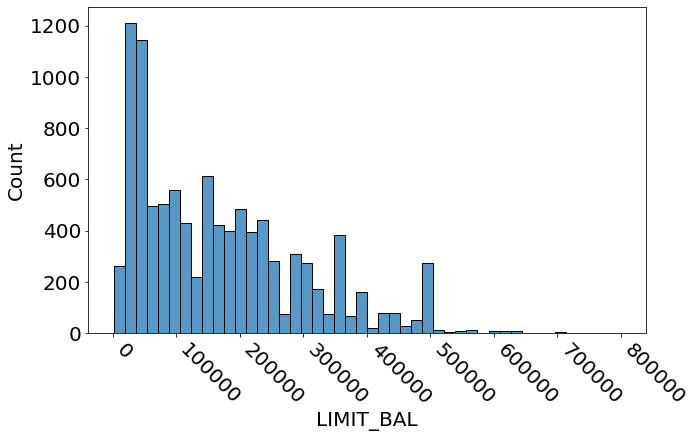

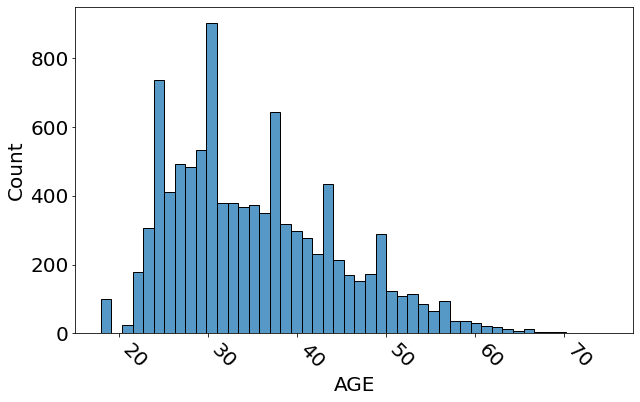

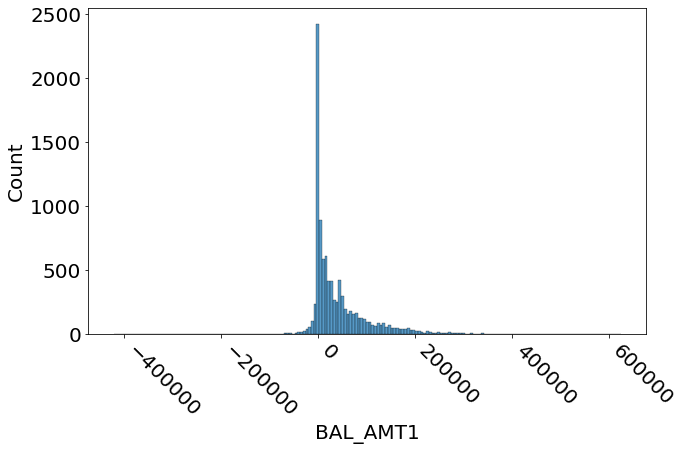

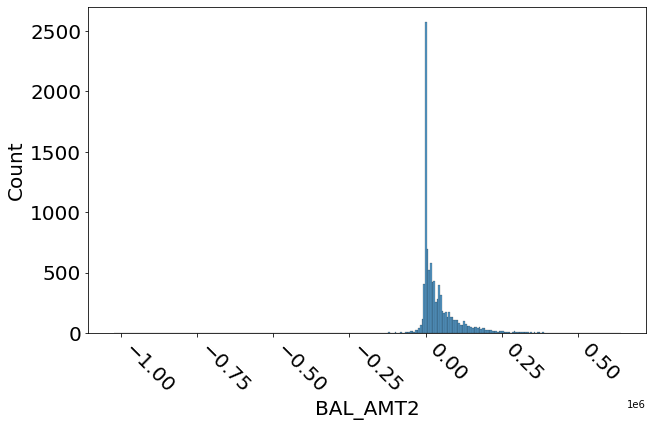

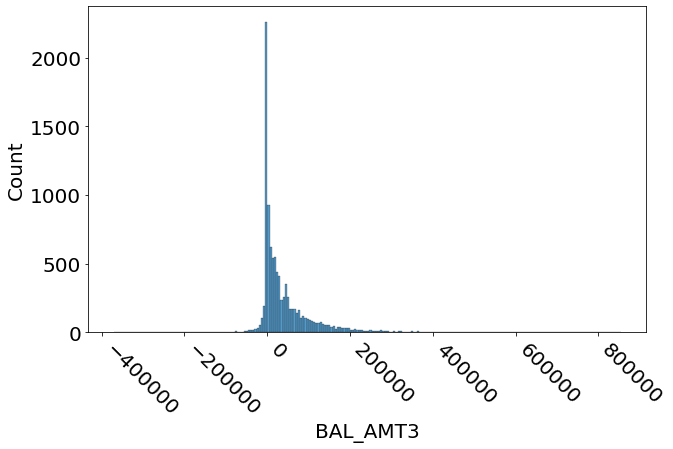

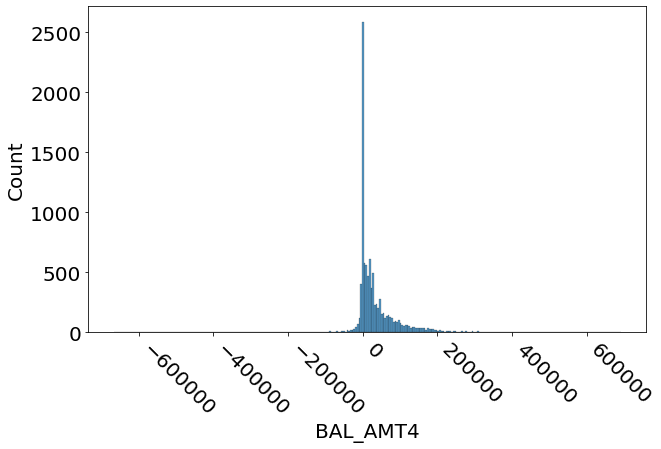

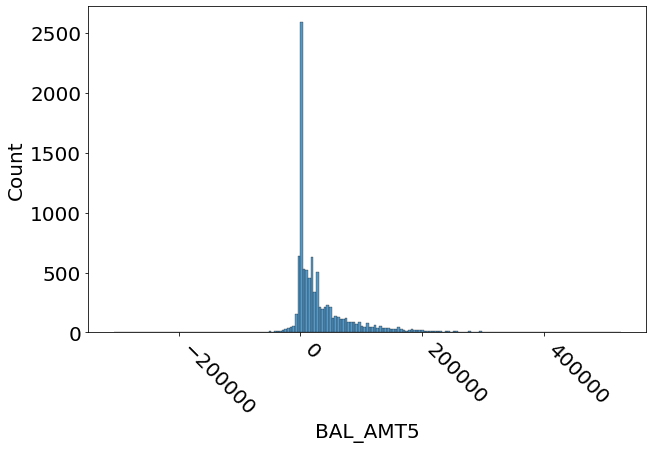

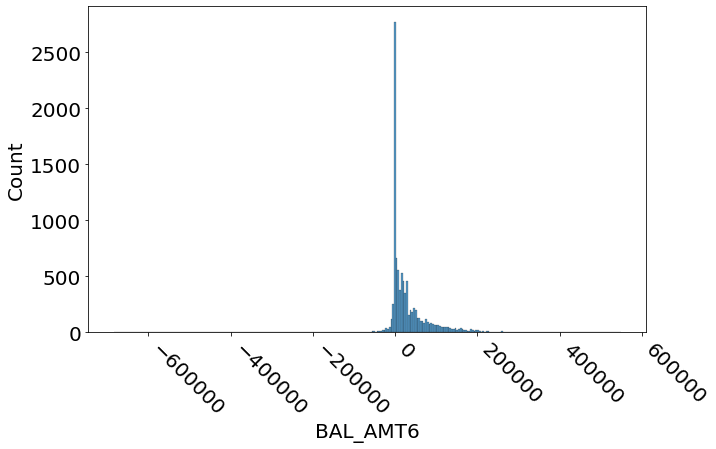

In [145]:
for num_feats in features_data.select_dtypes(include=["number"]).columns:
    plt.figure(figsize = (10, 6))
    ax = sns.histplot(x = num_feats, data=features_data)
    plt.xticks(rotation=-45, ha='left');
    
    #for container in ax.containers:
    #    ax.bar_label(container, fontsize = 20)

    ax.set_xlabel(ax.get_xlabel(), fontsize = 20);
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20);

    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        #label.set_fontname('Arial')
        label.set_fontsize(20)
        
    #ax.set_ylim(0, 1.08*features_data[num_feats].value_counts().max());

#### Data has some outliers that might cause overfitt, but let's save that for a second pass.
#### Lets look at cat data.

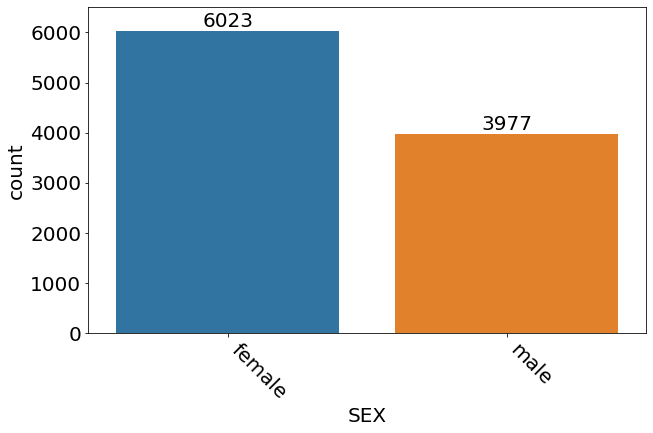

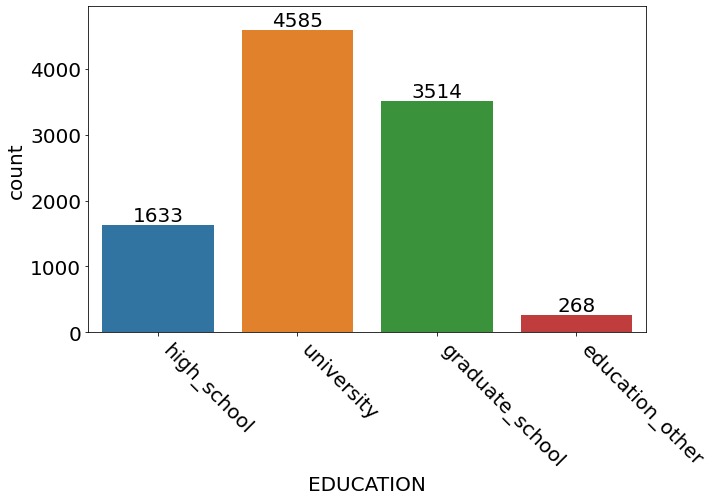

In [146]:
for num_feats in features_data.select_dtypes(include=["object"]).columns[:-1]:
    plt.figure(figsize = (10, 6))
    ax = sns.countplot(x = num_feats, data=features_data)
    plt.xticks(rotation=-45, ha='left');
    
    for container in ax.containers:
        ax.bar_label(container, fontsize = 20)

    ax.set_xlabel(ax.get_xlabel(), fontsize = 20);
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20);

    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        #label.set_fontname('Arial')
        label.set_fontsize(20)
        
    ax.set_ylim(0, 1.08*features_data[num_feats].value_counts().max());

In [147]:
features          = features_data.select_dtypes(include=["object"]).columns
combinations_cats = features_data[features].value_counts().to_frame('counts').reset_index()\
                          .sort_values(by='counts', ascending = False)
combinations_cats

,SEX,EDUCATION,MARRIAGE,counts
0,female,university,married,1517
1,female,graduate_school,single,1403
2,female,university,single,1323
3,male,university,single,926
4,male,graduate_school,single,912
5,male,university,married,751
6,female,graduate_school,married,653
7,female,high_school,married,603
8,male,graduate_school,married,528
9,female,high_school,single,338


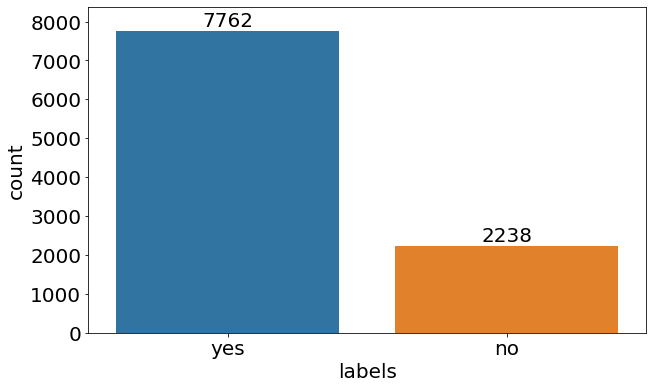

In [149]:
plt.figure(figsize = (10, 6))
ax = sns.countplot(x="labels", data=label_data)

for container in ax.containers:
    ax.bar_label(container, fontsize = 20)
    
ax.set_xlabel(ax.get_xlabel(), fontsize = 20);
ax.set_ylabel(ax.get_ylabel(), fontsize = 20);

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    #label.set_fontname('Arial')
    label.set_fontsize(20)

ax.set_ylim(0, 1.08*label_data['labels'].value_counts().max());